In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

/usr/local/lib/python3.8/dist-packages/python_jsonschema_objects/__init__.py:113: UserWarning: Schema id not specified. Defaulting to 'self'
  warnings.warn("Schema id not specified. Defaulting to 'self'")


In [3]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz
from pathlib import Path


In [4]:
segment_id = 864691135567721964

# Load the appropriate volume data inferface object

In [5]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [6]:
synapse_filepath = str(Path(f'./{segment_id}_synapses.csv').absolute())
synapse_filepath

'/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/864691135567721964_synapses.csv'

In [7]:
from datasci_tools import pandas_utils as pu
df = pu.csv_to_df(synapse_filepath)
df

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,864691135567721964,864691131808917685,126350506,postsyn,159015,163866,21373,4248
1,864691135567721964,864691131817266592,133926944,postsyn,162210,185292,22676,3708
2,864691135567721964,864691132002312394,133375145,postsyn,161962,212462,22829,7716
3,864691135567721964,864691132049643177,73532781,postsyn,128892,207884,23301,11496
4,864691135567721964,864691132146704984,167829877,postsyn,180030,206188,22035,5436
...,...,...,...,...,...,...,...,...
6348,864691135567721964,864691137197144897,82142719,presyn,121331,188683,24233,1504
6349,864691135567721964,864691137197151297,104203877,presyn,142890,172428,24107,4528
6350,864691135567721964,864691137197151297,104205943,presyn,144197,172298,24104,4228
6351,864691135567721964,864691137197153345,147748365,postsyn,170630,207400,22377,7020


In [8]:
vdi.set_synapse_filepath(
    synapse_filepath
)

# Data Prep: Loading mesh

In [9]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(451453, 3), faces.shape=(899885, 3), name=`864691135567721964.off`)>

In [10]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [11]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [12]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [13]:
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

xvfb-run -n 4047 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_3024.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_3024_decimated.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/decimation_meshlab_25131657.mls


In [14]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
}



# Step 2: Soma Identification

In [15]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [16]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [17]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [18]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 501 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_55962.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_55962_remove_interior.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_788008.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_55962.off
removed temporary output file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_55962_remove_interior.off
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_So

  0%|          | 0/9 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.846587]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 1733 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_598248.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_598248_poisson.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_813017.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_598248.off
removed temporary output file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_598248_poisson.off
mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_813017.mls is being deleted....
Inside sphere validater: ratio_val = 2.382242620807

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(278, 3), faces.shape=(550, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(278, 3), faces.shape=(550, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(234, 3), faces.shape=(462, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(234, 3), faces.shape=(462, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(2045, 3), faces.shape=(4086, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 6458 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25547618.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(512, 3), faces.shape=(1020, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_de

  0%|          | 0/4 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #3: <trimesh.Trimesh(vertices.shape=(1777, 3), faces.shape=(3550, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 9521 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25547618.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(445, 3), faces.shape=(886, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_dec

  0%|          | 0/6 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #4: <trimesh.Trimesh(vertices.shape=(1773, 3), faces.shape=(3542, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 9436 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25547618.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(444, 3), faces.shape=(884, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_dec

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.587199]
mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_450951.mls is being deleted....
Inside sphere validater: ratio_val = 108.49296057185164
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(356, 3), faces.shape=(706, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/178_mesh 
clusters:3 
smoothness:0.2

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry



 Total time for run = 163.280455827713
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 3689 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_30621.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_30621_fill_holes.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/fill_holes_512275.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_30621.off
removed temporary output file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_30621_fill_holes.off
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/fill_holes_512275.mls is being deleted....


  0%|          | 0/12 [00:00<?, ?it/s]

Largest hole before segmentation = 60920.9840611568, after = 330805.80253342,

ratio = 5.430079760388205, difference = 269884.81847226317
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
Not need to do a second pass because already found a soma


In [19]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 1


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [20]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [21]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':163.2804548740387,
    'soma_sdfs':array([0.846587]),
  },
}



# Step 2b: Saving off pipeline products

In [22]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/products_up_to_soma_stage.pkl
File size is 16.487215 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:139749663395168
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:139749712653424


# Step 3: Decomposition

In [35]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
soma_mesh_list_centers = [array([607290.85387328, 771034.57102043, 909995.31979156])]
Getting Glia and Nuclei Pieces Subtracted Away 0.3323655128479004
 Splitting mesh after soma cancellation 1.2962448596954346
# of split_meshes = 4
 Containing Mesh Indices 0.039308786392211914
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 9.298324584960938e-06
There were 3 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.9063529968261719
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]}

-

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:14<00:00, 14.69s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 16.252837896347046
branches_touching_root = [7]
combining close nodes
combine_threshold = 700
length of Graph = 36933
After combining close endpoints max(kept_branches_idx) = 136, len(kept_branches_idx) = 134
empty_indices % = 0.0
 conflict_indices % = 0.009613302211420458
Decomposing first pass: 29.675262451171875
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [148]
mesh_large_connectivity: 0.00020051002502441406
Finding MAP candidates connected components: 8.416175842285156e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1457672119140625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time fo

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.26it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.4099469184875488
connecting at the root
branches_touching_root = [12]
combining close nodes
combine_threshold = 700
length of Graph = 8858
After combining close endpoints max(kept_branches_idx) = 12, len(kept_branches_idx) = 13
empty_indices % = 0.0
 conflict_indices % = 0.0034268549791638754
Decomposing first pass: 9.711625337600708
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6901, 5352, 1964, 9762, 5269]
mesh_large_connectivity: 0.04676198959350586
Finding MAP candidates connected components: 0.00014448165893554688
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.3210270404815674
Grouping MP Sublimbs by Graph: 0.09410929679870605
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0016667842864990234
inside skeletonize_connected_branch and use_surface_after_CGAL=Tr

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.34it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.28251051902771
connecting at the root
branches_touching_root = [10]
combining close nodes
combine_threshold = 700
length of Graph = 7808
After combining close endpoints max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.003281260003841475
Decomposing first pass: 9.465368747711182
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [4233, 2490, 12101, 20206, 18379]
mesh_large_connectivity: 0.0818793773651123
Finding MAP candidates connected components: 0.00016450881958007812
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.25705742835998535
Grouping MP Sublimbs by Graph: 0.03938746452331543
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.003694295883178711
inside skeletonize_connected_branch and use_surface_after_CGAL=True,

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.271195650100708
connecting at the root
branches_touching_root = [18]
combining close nodes
combine_threshold = 700
length of Graph = 7941
After combining close endpoints max(kept_branches_idx) = 18, len(kept_branches_idx) = 19
empty_indices % = 0.0
 conflict_indices % = 0.0052689134108758326
Decomposing first pass: 8.802599430084229
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [13210, 384, 1476, 1117, 9471, 6170]
mesh_large_connectivity: 0.04604220390319824
Finding MAP candidates connected components: 0.000152587890625
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.2987399101257324
Grouping MP Sublimbs by Graph: 0.08119702339172363
Divinding into MP and MAP pieces: 1.430511474609375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0020592212677001953
inside skeletonize_connected_branch and use_surface_after_CGAL=Tr

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.60it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.6304612159729004
branches_touching_root = [3]
combining close nodes
combine_threshold = 700
length of Graph = 5157
After combining close endpoints max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.005621387664616928
Decomposing first pass: 5.511936664581299
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2977, 1369, 4763]
mesh_large_connectivity: 0.01388406753540039
Finding MAP candidates connected components: 0.00020837783813476562
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.19360852241516113
Grouping MP Sublimbs by Graph: 0.0696256160736084
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.001069784164428711
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.4196207523345947
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 3511
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.003035182203468251
Decomposing first pass: 4.299175262451172
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [976, 2838]
mesh_large_connectivity: 0.002218008041381836
Finding MAP candidates connected components: 8.606910705566406e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.14654946327209473
Grouping MP Sublimbs by Graph: 0.028775930404663086
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0005574226379394531
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx 

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.51it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.22631287574768066
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 1591
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
Decomposing first pass: 2.8188185691833496
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [28180]
mesh_large_connectivity: 0.00012373924255371094
Finding MAP candidates connected components: 7.009506225585938e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.025061368942260742
Grouping MP Sublimbs by Graph: 6.818771362304688e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0053157806396484375
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     S

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 253.66it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03014373779296875
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 126
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
widths = [137.61576506]
width_median= 137.61576505644436
segment_widths_median = [137.61576506]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 247.90it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.10292649269104004
branches_touching_root = [1]
combining close nodes
combine_threshold = 1300
length of Graph = 168
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.03391959798994975


widths = [141.07255967 136.47147142 214.50119106]
width_median= 148.42274253440098
segment_widths_median = [141.07255967 136.47147142 214.50119106]
Using the axon parameters
Decomposing first pass: 0.0924844741821289
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.337860107421875e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2411346435546875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.2358710765838623
Removed 0 skeletal branches
795 796
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.41658544540405273
Floating 1: <trimesh.Trimesh(vertices.shape=(63, 3), faces.shape=(120, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 369.28it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.036126136779785156
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
widths = [151.68624241]
width_median= 151.68624241440332
segment_widths_median = [151.68624241]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 337.05it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03792142868041992
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
widths = [151.68980278]
width_median= 151.6898027841641
segment_widths_median = [151.68980278]
Using the axon parameters
Decomposing first pass: 0.01758742332458496
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.719329833984375e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.8835067749023438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phas

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.17005658149719238
Floating 2: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(115, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.0067901611328125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 301.68it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.01755547523498535
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
widths = [316.6524229]
width_median= 316.65242289504647
segment_widths_median = [316.6524229]
Decomposing first pass: 0.016168832778930664
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2411346435546875e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9311904907226562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.07104039192199707


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.03614988978692138
 conflict_indices % = 0.0037472446730345333
main_branch = 4
Total time for stitching floating pieces = 10.901894569396973
Total time for Concept Networks = 15.812766075134277
Total time for all mesh and skeletonization decomp = 493.1870057582855
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2231 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_389594.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_389594_poisson.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_329383.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Pr

    current_width= 280.07182547384673
Working on limb L4 branch 7
    No spines and using precomputed width: 175.86060412561818
Working on limb L4 branch 2
    current_width= 263.16899449126436
Working on limb L4 branch 4
    current_width= 311.3052812401028
Working on limb L4 branch 3
    current_width= 226.18198580360735
Working on limb L4 branch 6
    No spines and using precomputed width: 192.22606103868372
Working on limb L4 branch 1
    current_width= 242.99401936608882
Working on limb L4 branch 5
    current_width= 274.3811050502981
Working on limb L5 branch 0
    No spines and using precomputed width: 343.2818640660555
Working on limb L5 branch 1
    No spines and using precomputed width: 140.3538223070222
Working on limb L5 branch 3
    No spines and using precomputed width: 394.4135837912502
Working on limb L5 branch 2
    current_width= 281.2288499004053
Working on limb L5 branch 4
    current_width= 262.83065112995826
Working on limb L6 branch 0
    current_width= 300.23557

In [36]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [37]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [38]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':164.12158823013306,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Saving off neuron

In [39]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.2193918228149414
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.8096551895141602
Total time for limb_meshes compression = 1.6809203624725342
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 22.216148853302002
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:139737890407280
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:139737691176864
Total time for compression = 76.7937171459198


---Finished outputing neuron at location: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/864691135567721964---
saved neuron filepath = 864691135567721964


'864691135567721964.pbz2'

# Reloading the Neuron

In [23]:
neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    #mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


In [24]:
print(neuron_obj_rec.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':164.12158823013306,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Step 4A: Multi Soma Split Suggestions

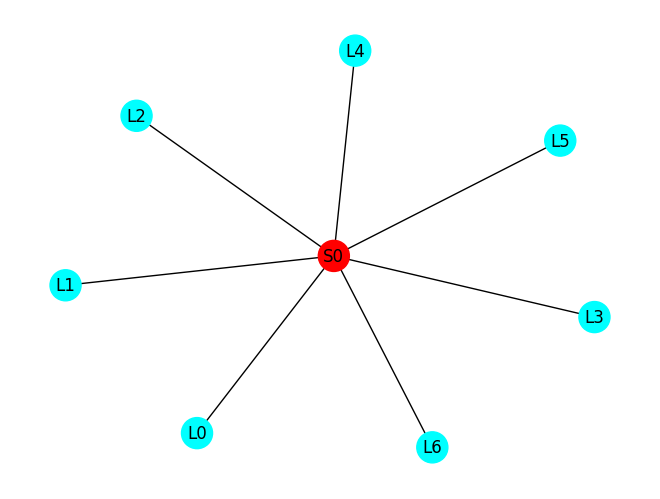

In [26]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj_rec
)

In [27]:
multi_soma_split_parameters = dict()

In [29]:
_ = neuron_obj_rec.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


In [45]:
neuron_obj.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

# Step 4B: Multi Soma Split Execution

In [35]:
neuron_list = neuron_obj_rec.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [36]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':164.12158823013306,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Step 5: Cell Typing

In [37]:
from neurd import neuron_pipeline_utils as npu

In [38]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 3


Number of segments: 3


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segme

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:23<00:00, 23.51s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 24.866177082061768
branches_touching_root = [15]
combining close nodes
combine_threshold = 1300
length of Graph = 47118
After combining close endpoints max(kept_branches_idx) = 490, len(kept_branches_idx) = 449
empty_indices % = 0.0
 conflict_indices % = 0.028083451415478307
Decomposing first pass: 98.958660364151
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.3603439331054688e-05
Total time for MAP sublimb processing 6.67572021484375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.910064697265625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.002446889877319336
sbv[0].reshape(-1,3) = [[606217.5 761733.  911841. ]]
closest_sk_pt_coord BEFORE = [607085.45171222 761489.43217667 911789.29988978]
current_s

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 303.82it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.012776374816894531
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
Decomposing first pass: 0.020809173583984375
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.049041748046875e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9073486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.034792423248291016
Removed 0 skeletal branches
119 120
For marked faces: None
empty_indices % = 0.0
 

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.08960723876953125
concept_network_dict = {0: [<datasci_tools.networkx_utils.GraphOrderedEdges object at 0x7f1a02698880>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [607212.4 761727.8 911846.2]---------
Starting_edge inside branches_to_conept = [[606459.1 760534.7 912002.4]
 [607212.4 761727.8 911846.2]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [435]
printing out current edge:
[[607212.4 761727.8 911846.2]
 [606459.1 760534.7 912002.4]]
edge_endpoints_to_process was empty so exiting loop after 450 iterations
starting_node in concept map (that should match the starting edge) = 440
Total time for branches to concept conversion = 4.81751275062561

Done generating concept network 



Number of segments: 5


Number of segments: 8


Number of segments: 18


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 6


Number of segmen

In [39]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 1.4666225110975901
syn_density_head = 0.09545689619643798
syn_density_neck = 0.00758597850567719
syn_density_shaft = 1.32280500192746
sk_length_synapse_density = 3163731.6111611566
About to do spine_density stats
postsyn_limb_branch = {'L1': array([ 0,  1,  7, 10, 11, 12, 14]), 'L2': array([ 0,  4,  8,  9, 12, 13, 14]), 'L3': array([ 0, 11, 12]), 'L4': array([0, 1, 2, 5]), 'L5': array([2, 4]), 'L6': array([0])}
sk_length = 2601725.0360882347
# of spines = 262
Density = 0.1007024171908359
spine_density = 0.1007024171908359 (multiplier = 1000)
sk_length spine density = 2601725.0360882347
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = inhibitory, pred_class_label = inhibitory
Total time for e/i calculations = 0.21242594718933105
baylor_e_i = inhibitory

*****Using v7 INHIBITORY Filters!!!


Current n

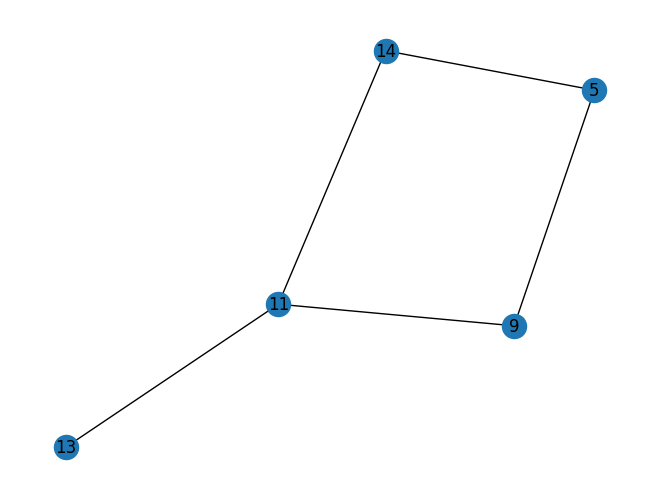

Performing global features query
Done with edge_df: 0.002733945846557617
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   9  11     49.54   26.760690               0.268072              0.000228   
1   9   5     62.37   30.300366               0.232852              0.000341   
2  11  13     27.84   31.107051               0.425739              0.000228   
3  11  14     56.20    3.728196               0.051025              0.000082   
4  14   5     48.78   53.332860               0.409852              0.000195   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                1                       None                          None  
2                1                       None                          None  
3        

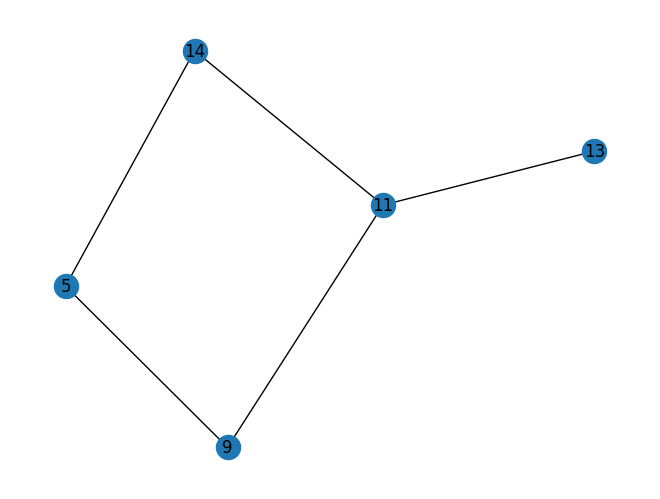

Performing node features query
Done with edge_df: 0.003262758255004883
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   9  11     49.54   26.760690               0.268072              0.000228   
1   9   5     62.37   30.300366               0.232852              0.000341   
2  11  13     27.84   31.107051               0.425739              0.000228   
3  11  14     56.20    3.728196               0.051025              0.000082   
4  14   5     48.78   53.332860               0.409852              0.000195   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                       None                          None   
1                1                       None                          None   
2                1                       None                          None   
3        

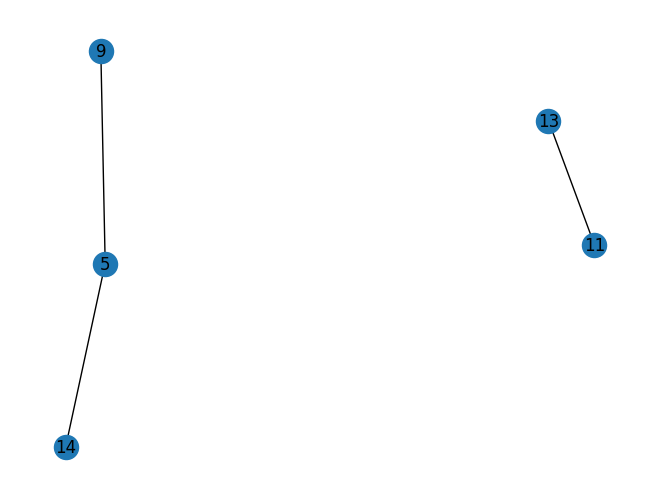

for upstream node 5, winning_node = None, error_branches = [ 9 11 13 14]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2295.972661153861 but max skip distance was 2295.972661153861
Current node skip distance was 1405.4375485078242 but max skip distance was 1405.4375485078242
Current node skip distance was 1582.611007405655 but max skip distance was 1582.611007405655
Current node skip distance was 1546.9734240260361 but max skip distance was 1546.9734240260361
Current node skip distance was 1471.108130620547 but max skip distance was 1681.1326431753064
Current node skip distance was 1341.4954171802704 but max skip distance was 1341.4954171802704
Current node skip distance was 1486.6422825420861 but max skip distance was 1486.6422825420861
Current node skip distance was 1817.724537011968 but max skip distance was 2295.972661153861
Current node skip distance was 1501.0959360356467 but max skip distance was 1501.0959

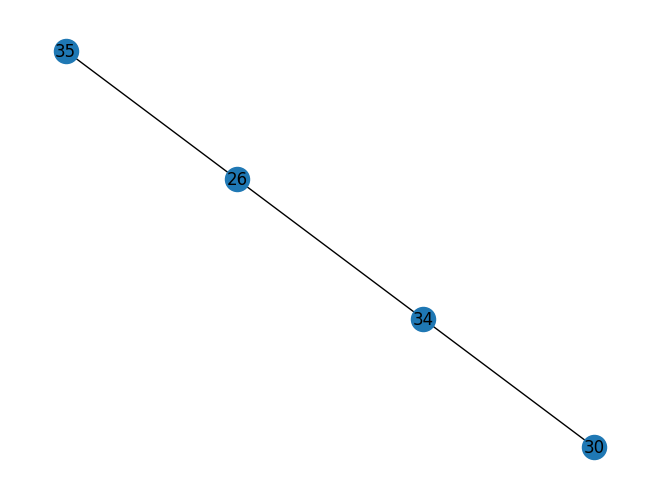

Performing global features query
Done with edge_df: 0.0009708404541015625
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  34     59.58   12.255811               0.146685              0.000283   
1  26  35     25.87   18.006419               0.177302              0.000099   
2  30  34     49.14    1.563732               0.016592              0.000283   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                3                       True                          None  
1                2                      False                          None  
2                3                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   18.006419               0.177302              

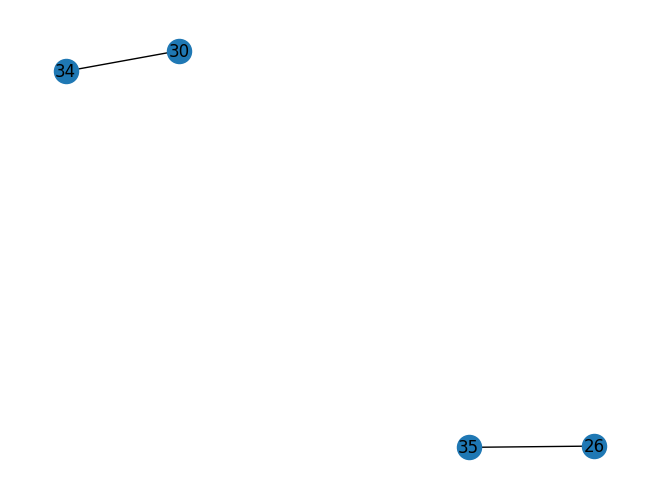

Performing node features query
Done with edge_df: 0.0027141571044921875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   18.006419               0.177302              0.000099   
1  30  34     49.14    1.563732               0.016592              0.000283   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                      False                          None   
1                3                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   18.006419               0.177302              0.000099   
1  30  34     49.14    1.563732               0.016592             

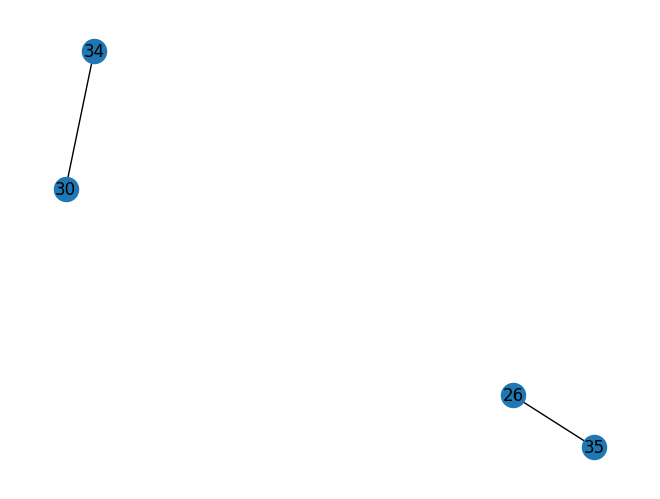

for upstream node 35, winning_node = 26, error_branches = [30 34]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (83.5516809667269) less than width_min(250)
Current node skip distance was 1666.2227556825383 but max skip distance was 1666.2227556825383
Current node skip distance was 1596.5980444725747 but max skip distance was 1687.839175191355
Current node skip distance was 1465.4945829272474 but max skip distance was 1465.4945829272474
Current node skip distance was 1465.5076501675849 but max skip distance was 1465.5076501675849
Current node skip distance was 1481.2995057656967 but max skip distance was 2116.272690048111
Current node skip distance was 1805.9048120256557 but max skip distance was 1805.9048120256557
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010187625885009766
Performing Edge Query
After edge filter, # of row

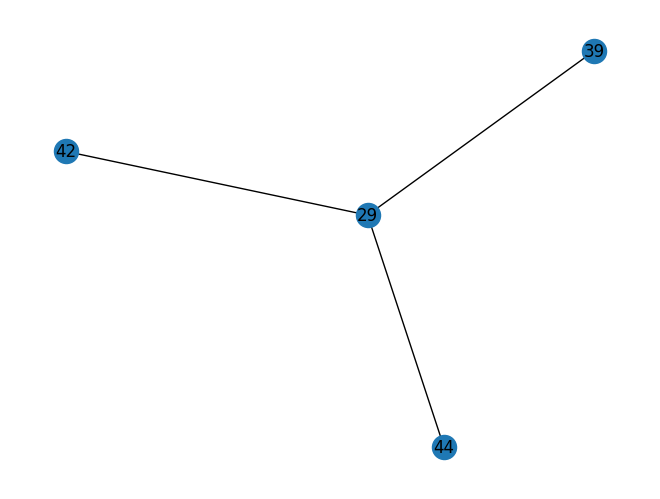

Performing global features query
Done with edge_df: 0.0010235309600830078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17    6.047841               0.048021              0.000000   
1  29  42     38.61   54.219466               0.430514              0.000033   
2  29  44     33.11   27.475853               0.179092              0.000352   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                1                       None                          None  
2                2                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17    6.047841               0.048021              

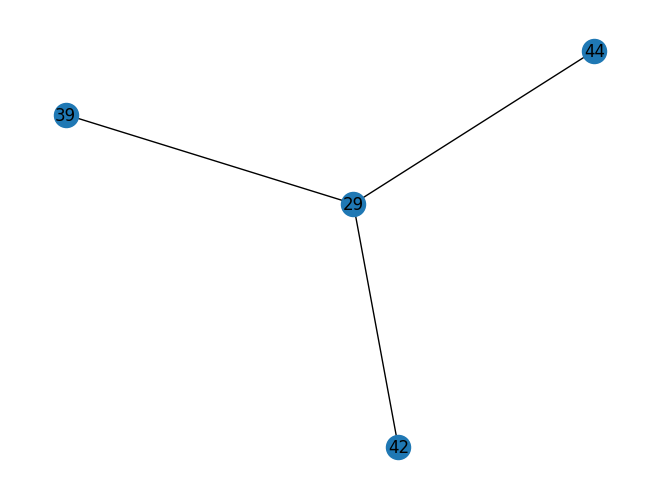

Performing node features query
Done with edge_df: 0.0028378963470458984
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17    6.047841               0.048021              0.000000   
1  29  42     38.61   54.219466               0.430514              0.000033   
2  29  44     33.11   27.475853               0.179092              0.000352   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                1                       None                          None   
2                2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_di

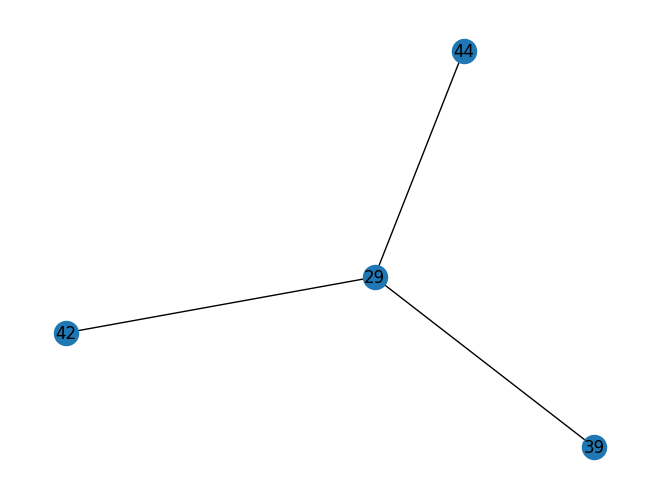

for upstream node 44, winning_node = None, error_branches = [29 39 42]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1407.2364002485333 but max skip distance was 1407.2364002485333
Current node skip distance was 1437.4230453052987 but max skip distance was 1437.4230453052987
Current node skip distance was 1697.3244725786685 but max skip distance was 1887.4383708735236
Current node skip distance was 1533.0819962936434 but max skip distance was 1533.0819962936434
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1759.9527762328148 but max skip distance was 1759.9527762328148
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1983.9878891513208 but max skip distance was 2016.3691093054942
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1490.7851567970627 but max skip 

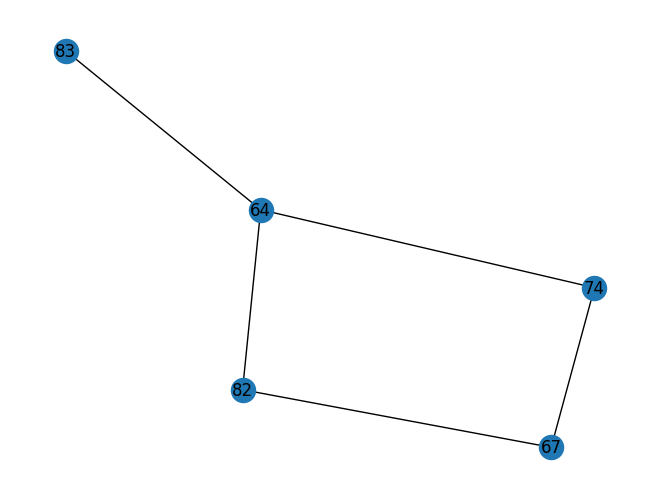

Performing global features query
Done with edge_df: 0.002593994140625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  64  82     27.25   16.601337               0.289888              0.000162   
1  64  83     32.69   18.387702               0.321081              0.000251   
2  64  74     36.69    6.557693               0.102744              0.000251   
3  67  82     25.44    3.459579               0.044738              0.000015   
4  67  74     26.27   13.503222               0.211564              0.000074   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                4                       None                          None  
1                2                       None                          None  
2                2                       None                          None  
3           

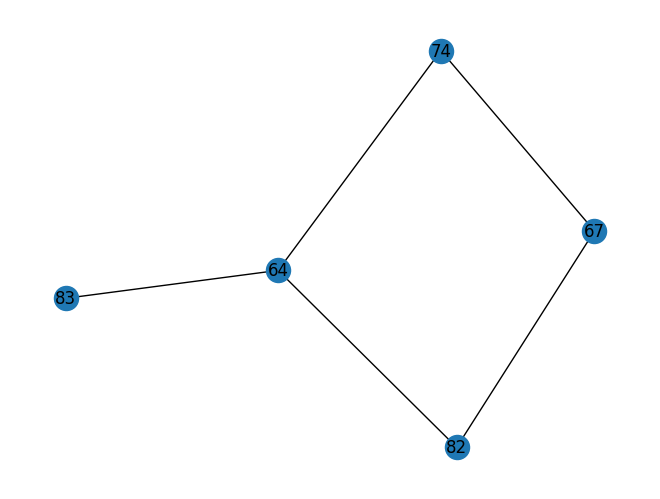

Performing node features query
Done with edge_df: 0.0012221336364746094
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  64  82     27.25   16.601337               0.289888              0.000162   
1  64  83     32.69   18.387702               0.321081              0.000251   
2  64  74     36.69    6.557693               0.102744              0.000251   
3  67  82     25.44    3.459579               0.044738              0.000015   
4  67  74     26.27   13.503222               0.211564              0.000074   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                4                       None                          None   
1                2                       None                          None   
2                2                       None                          None   
3       

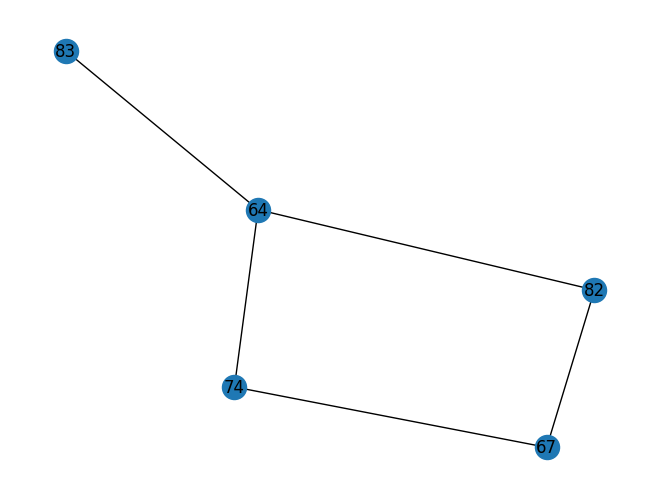

for upstream node 74, winning_node = None, error_branches = [64 67 82 83]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1653.1417471029363 but max skip distance was 1715.708392446817
Current node skip distance was 1481.4148789611995 but max skip distance was 1786.4304999506107
Current node skip distance was 1436.6213580418726 but max skip distance was 1519.4828706434616
Current node skip distance was 1963.852938261993 but max skip distance was 2300.0
Current node skip distance was 1974.0576142283694 but max skip distance was 1981.7785867555413
Current node skip distance was 1474.4560454204889 but max skip distance was 1474.4560454204889
Current node skip distance was 1444.1725690480719 but max skip distance was 1903.4195910647952
Current node skip distance was 2015.318883068006 but max skip distance was 2217.1165774050996
Current node skip distance was 1826.373167839528 but max skip distance was 2300.0
Current no

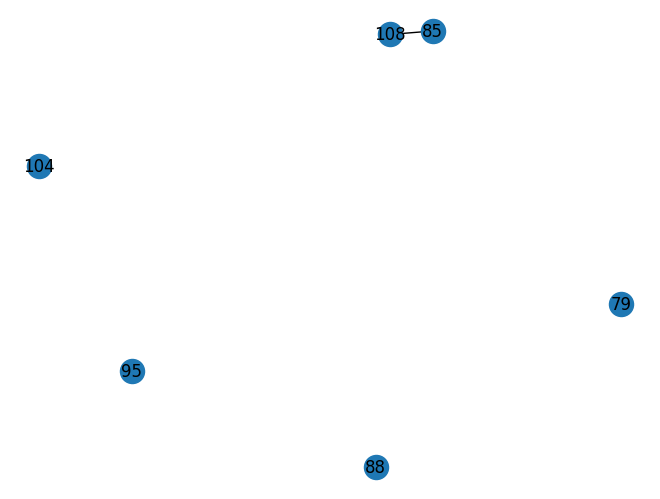

Performing global features query
Done with edge_df: 0.0009613037109375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   57.934962               0.378859              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                3                       None                          None  
Afer Global query: 
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   57.934962               0.378859              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                3                       None                          None  


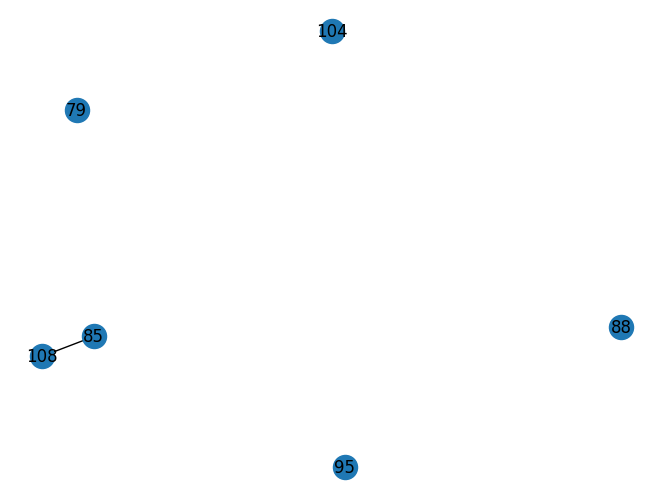

Performing node features query
Done with edge_df: 0.0010433197021484375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   57.934962               0.378859              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                3                       None                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   57.934962               0.378859              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                3                       None                          None   

  above_threshold_delete  
0                   None  


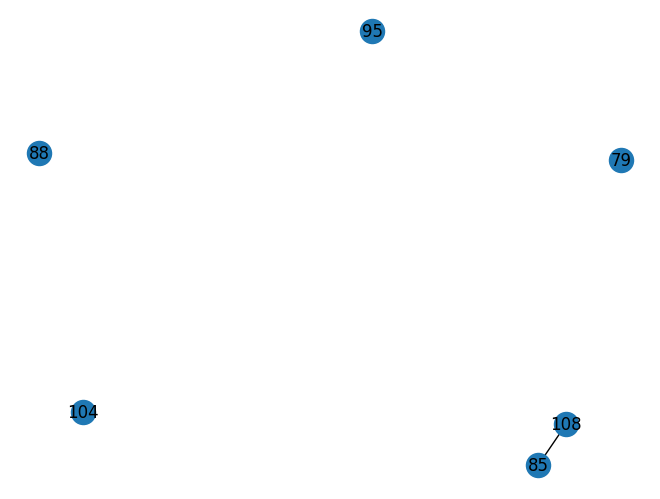

for upstream node 108, winning_node = 85, error_branches = [ 79  88  95 104]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1510.8185578822008 but max skip distance was 1510.8185578822008
Current node skip distance was 1458.786587331158 but max skip distance was 1458.786587331158
Current node skip distance was 1770.8640452267325 but max skip distance was 1803.8310592164503
Current node skip distance was 1830.3377839786276 but max skip distance was 2300.0
Current node skip distance was 1511.088544241397 but max skip distance was 1511.088544241397
Current node skip distance was 1405.0804816159211 but max skip distance was 2043.1821037801099
Current node skip distance was 1960.9148168013344 but max skip distance was 1960.9148168013344
Current node skip distance was 2156.631836281324 but max skip distance was 2156.631836281324
Current node skip distance was 1602.8621560881274 but max skip distance was 16

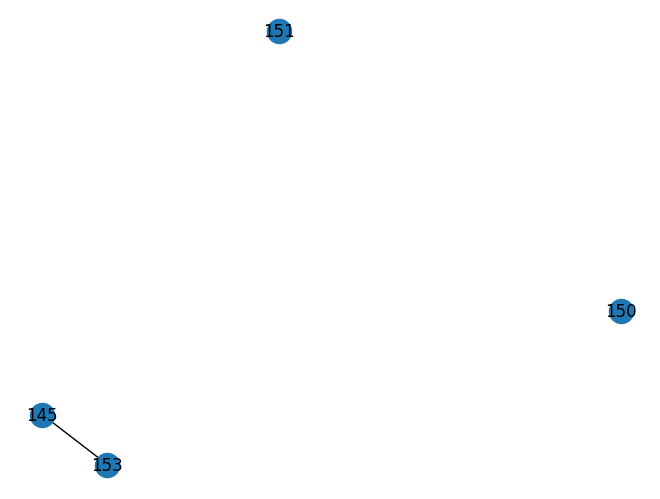

Performing global features query
Done with edge_df: 0.0010807514190673828
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete  
0                          None  


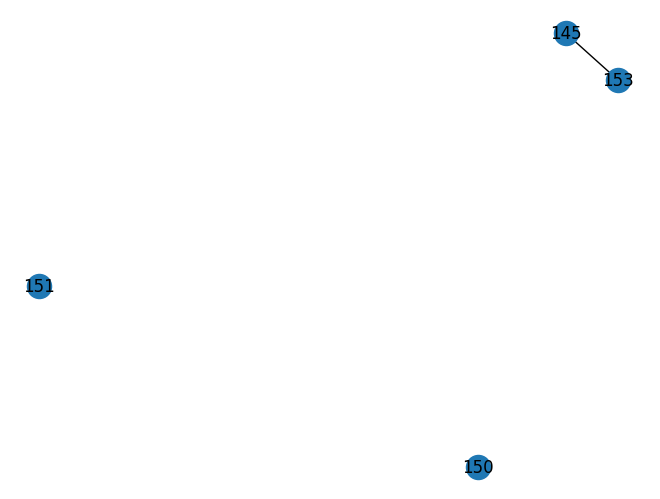

Performing node features query
Done with edge_df: 0.0017426013946533203
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


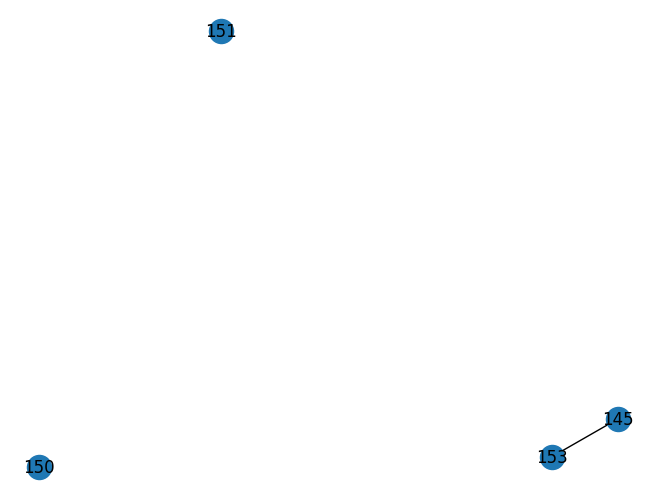

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1476.7236141240276 but max skip distance was 1792.8739031814362
Current node skip distance was 1668.5220917782256 but max skip distance was 1668.5220917782256
Current node skip distance was 1779.967982654061 but max skip distance was 2052.2462895062013
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0011179447174072266
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  150     51.68   78.242089               0.933851   
1  145  153     26.01   36.660981               0.437564   
2  145  154    120.63    4.160334               0.052250   
3  150  153    102.70   41.581108               0.256632   
4  

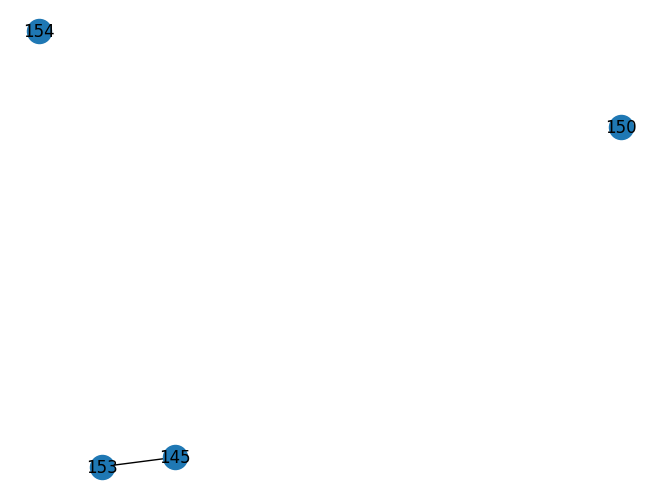

Performing global features query
Done with edge_df: 0.0009317398071289062
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete  
0                          None  


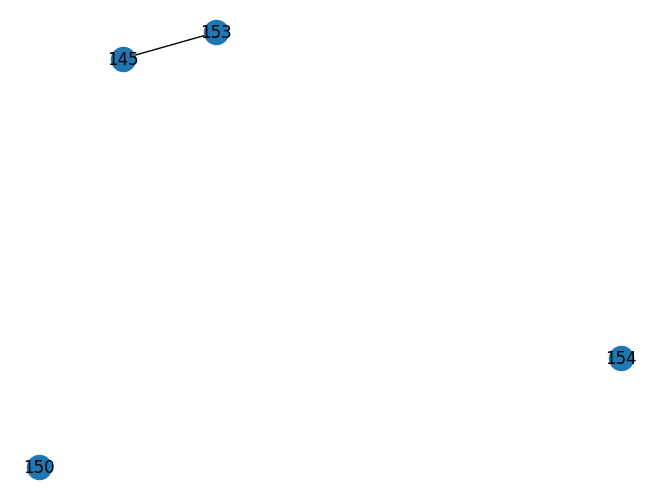

Performing node features query
Done with edge_df: 0.0010483264923095703
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0               0.00012                3                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


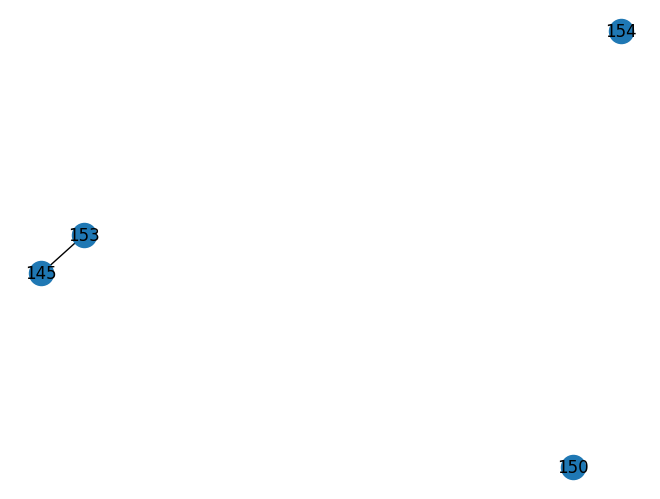

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1495.6655827179904 but max skip distance was 1495.6655827179904
Current node skip distance was 2004.6812218672449 but max skip distance was 2300.0
Current node skip distance was 1508.5093711863892 but max skip distance was 1508.5093711863892
Current node skip distance was 1688.7729390052598 but max skip distance was 1688.7729390052598
Current node skip distance was 1660.991367688352 but max skip distance was 1859.441345211907
Current node skip distance was 1471.5851631431447 but max skip distance was 1507.6521660753895
Current node skip distance was 1537.8446294301966 but max skip distance was 1928.580920546221
Current node skip distance was 1693.3042837882767 but max skip distance was 1693.3042837882767
Current node skip distance was 1928.580920546221 but max skip distance was 1928.580920546221
Current node skip distance was 1490.4254885820962 but max skip distance w

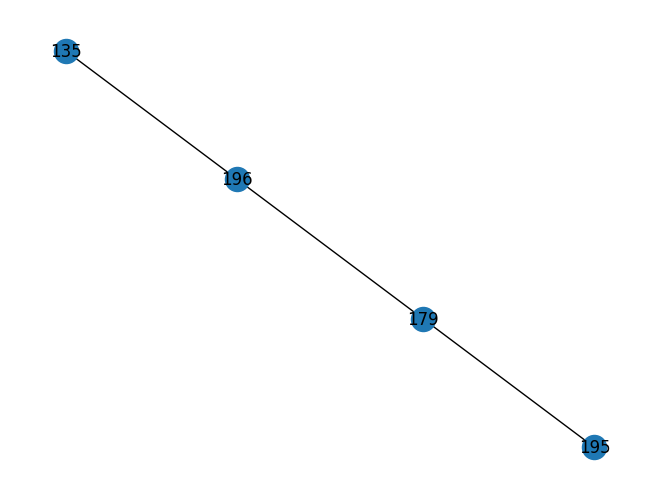

Performing global features query
Done with edge_df: 0.0010318756103515625
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   
2  196  179     64.03   12.284254               0.163567   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000079                2                      False   
1              0.000000                0                       None   
2              0.000000                0                       True   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   

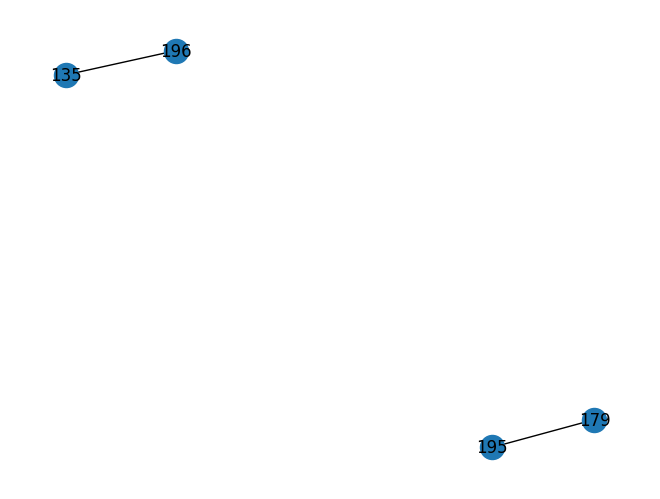

Performing node features query
Done with edge_df: 0.0031523704528808594
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000079                2                      False   
1              0.000000                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   

   synapse_density_diff  n_synapses_diff

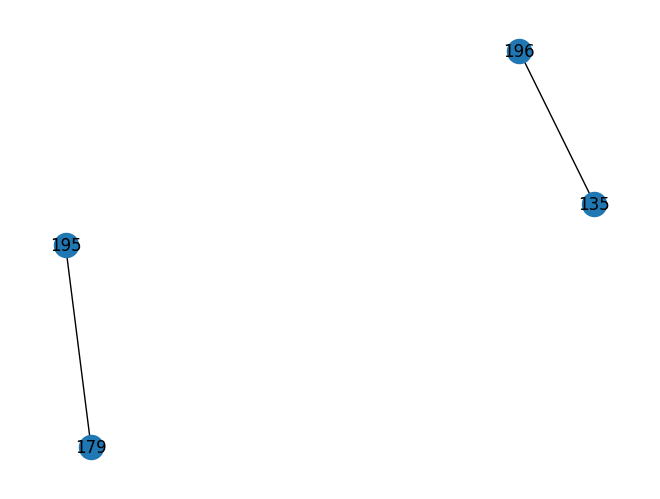

for upstream node 179, winning_node = 195, error_branches = [135 196]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (88.49933586232837) less than width_min(250)
Current node skip distance was 1469.3026492194927 but max skip distance was 1669.15941494473
Current node skip distance was 1910.4243301399592 but max skip distance was 1960.9148168013344
Current node skip distance was 2211.993355747869 but max skip distance was 2211.993355747869
Current node skip distance was 1568.8309457850537 but max skip distance was 1568.8309457850537
Current node skip distance was 1475.5326438941484 but max skip distance was 1475.5326438941484
Current node skip distance was 1435.7503089812697 but max skip distance was 1435.7503089812697
Current node skip distance was 1534.3086373964634 but max skip distance was 2118.165735085339
Current node skip distance was 1759.4129353208561 but max skip distance was 1759.4129353208561
Current node skip distance was 1471.4291591100111 but max

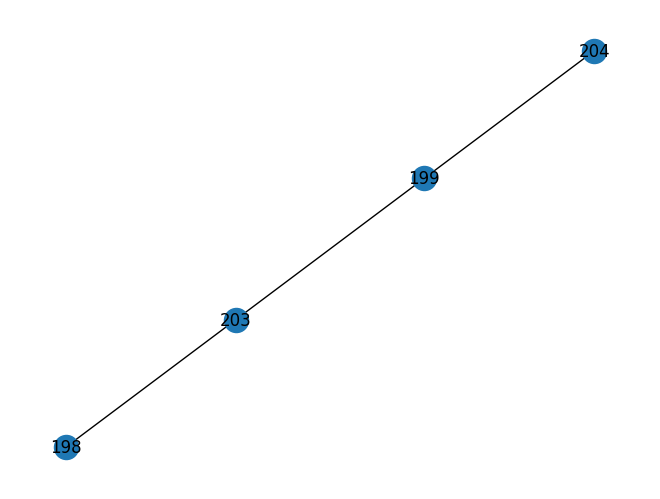

Performing global features query
Done with edge_df: 0.001005411148071289
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.519630   
1  199  204     26.38   12.530224               0.158499   
2  199  203     59.48   84.585470               0.516897   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000086                4                       False   
1              0.000175                2                       False   
2              0.000144                1                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.519630

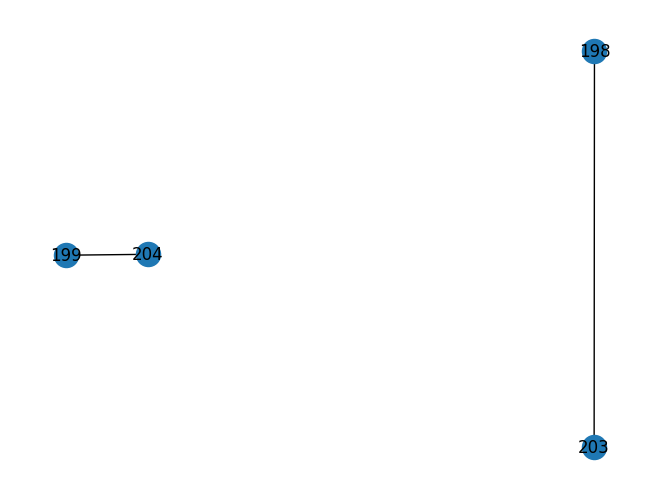

Performing node features query
Done with edge_df: 0.0031180381774902344
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.519630   
1  199  204     26.38   12.530224               0.158499   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000086                4                       False   
1              0.000175                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   85.032745               0.519630   
1  199  204     26.38   12.530224               0.158499   

   synapse_density_diff  n_synapses_d

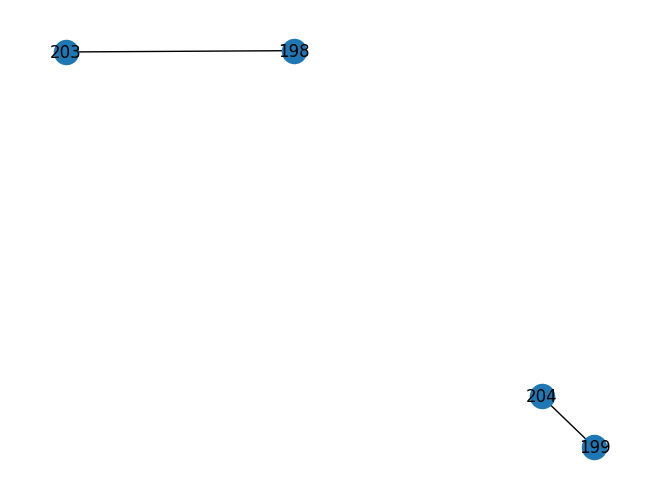

for upstream node 203, winning_node = 198, error_branches = [199 204]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (112.310866119622) less than width_min(250)
Current node skip distance was 1443.854790039841 but max skip distance was 1443.854790039841
Current node skip distance was 1506.252005449707 but max skip distance was 2300.0
Current node skip distance was 1837.6444359681964 but max skip distance was 1837.6444359681964
Current node skip distance was 1536.1693446150296 but max skip distance was 1536.1693446150296
Current node skip distance was 1780.4587744781402 but max skip distance was 1780.4587744781402
Current node skip distance was 1588.8389286739557 but max skip distance was 1588.8389286739557
Current node skip distance was 1835.2672126080483 but max skip distance was 1908.8208118142009
Current node skip distance was 1992.7803804147252 but max skip distance was 1992.7803804147252
Current node skip distance was 1736.0556718692453 but max skip dista

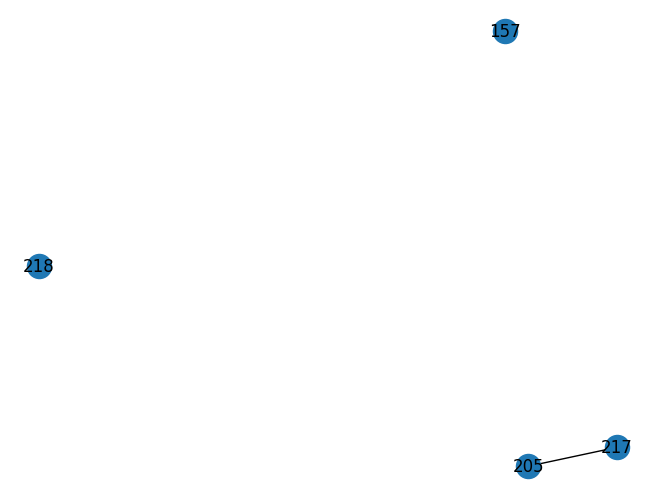

Performing global features query
Done with edge_df: 0.0010967254638671875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete  
0                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete  
0                          False  


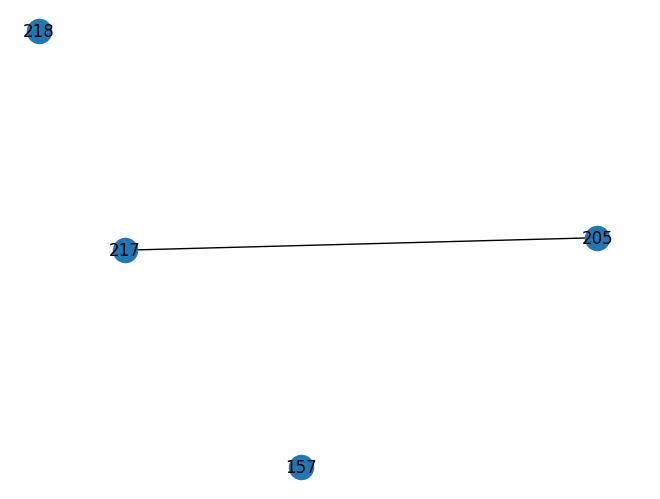

Performing node features query
Done with edge_df: 0.001007080078125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    5.698838               0.069924   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  


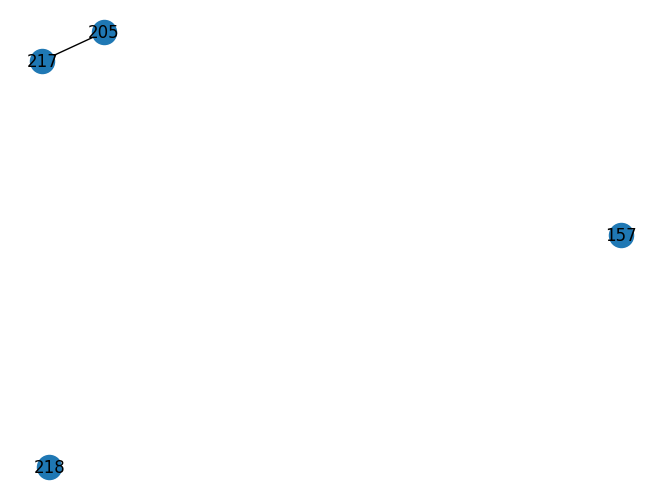

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1768.6519015961258 but max skip distance was 1848.5035166199302
Current node skip distance was 1662.4847643852409 but max skip distance was 2212.423557991369
Current node skip distance was 1889.0889132316686 but max skip distance was 2130.8912018129113
Current node skip distance was 1800.4908031559103 but max skip distance was 1800.4908031559103
Current node skip distance was 1853.5541277890418 but max skip distance was 1853.5541277890418
Current node skip distance was 1504.618219267223 but max skip distance was 1853.5541277890418
Current node skip distance was 1739.262976609458 but max skip distance was 1830.9796473087345
Current node skip distance was 1501.897991570399 but max skip distance was 1739.262976609458
Current node skip distance was 1581.11044964013 but max skip distance was 1581.11044964013
Current node skip distance was 1826.047428595606 but max skip dis

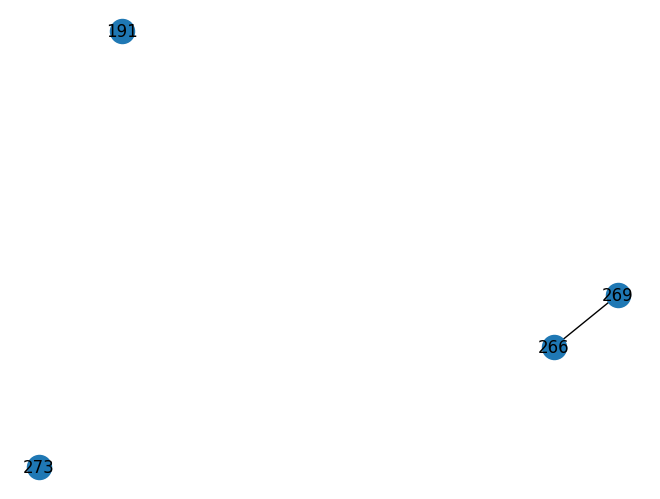

Performing global features query
Done with edge_df: 0.0019614696502685547
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000194                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000194                1                       False   

  definite_partner_width_delete  
0                          None  


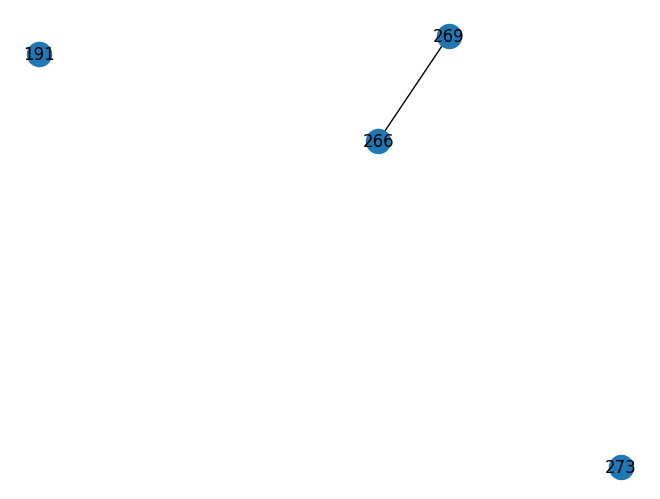

Performing node features query
Done with edge_df: 0.0011703968048095703
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000194                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000194                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


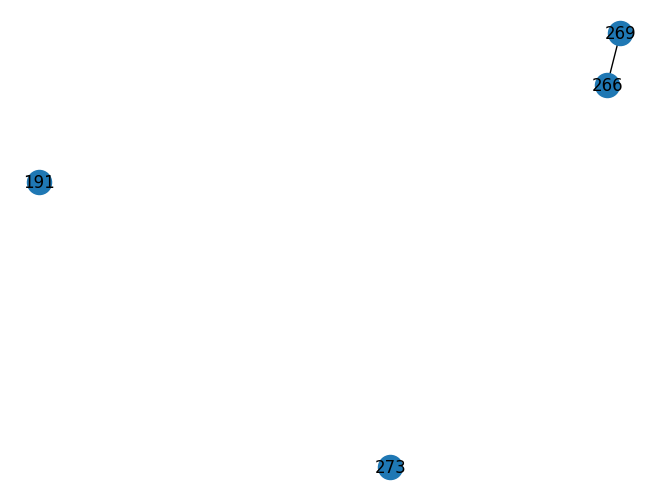

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2086.708888809626 but max skip distance was 2165.6546601796394
Current node skip distance was 2071.052502035698 but max skip distance was 2071.052502035698
Current node skip distance was 2165.6546601796394 but max skip distance was 2165.6546601796394
Current node skip distance was 1864.25330271235 but max skip distance was 1979.3255921928808
Current node skip distance was 1986.4866200783395 but max skip distance was 1986.4866200783395
Current node skip distance was 1745.1382455391195 but max skip distance was 2270.161544876122
Current node skip distance was 2024.380261078134 but max skip distance was 2024.380261078134
Current node skip distance was 1661.821926669315 but max skip distance was 1879.998471194872
Current node skip distance was 1905.8136733398924 but max skip distance was 2024.380261078134
branch_match_query = :
(((width_diff < 75) or (width_diff_percentag

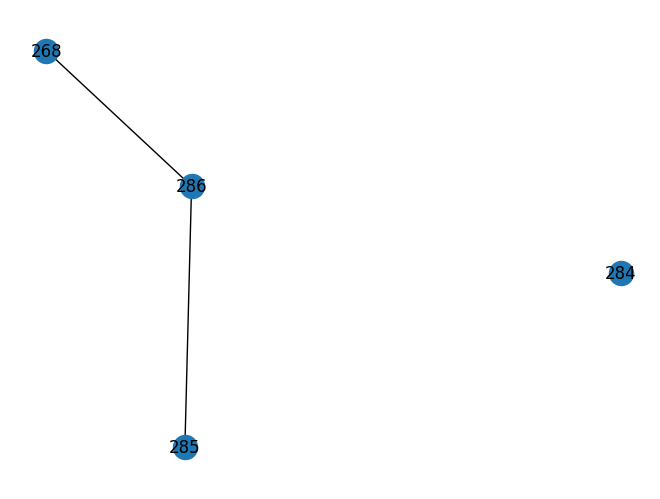

Performing global features query
Done with edge_df: 0.0010099411010742188
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  268  286     39.32  129.885150               0.555691   
1  285  286     28.94  114.898842               0.491575   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000342                5                       None   
1              0.000218                2                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  268  286     39.32  129.885150               0.555691   
1  285  286     28.94  114.898842               0.491575   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000342         

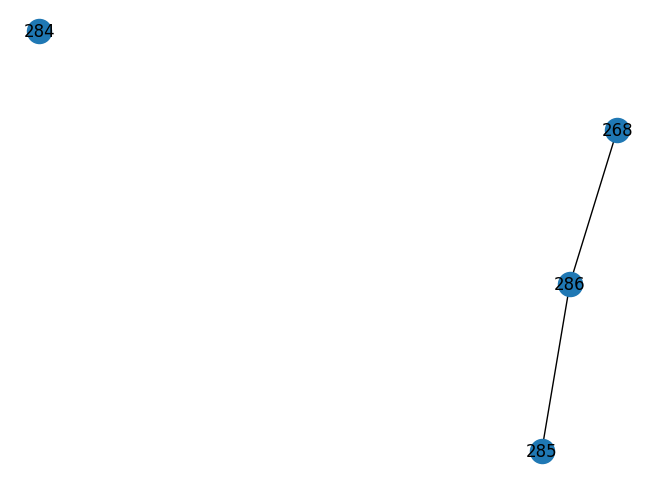

Performing node features query
Done with edge_df: 0.002743959426879883
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  268  286     39.32  129.885150               0.555691   
1  285  286     28.94  114.898842               0.491575   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000342                5                       None   
1              0.000218                2                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  268  286     39.32  129.885150               0.555691   
1  285  286     28.94  114.898842               0.491575   

   synapse_density_diff  n_synapses_diff 

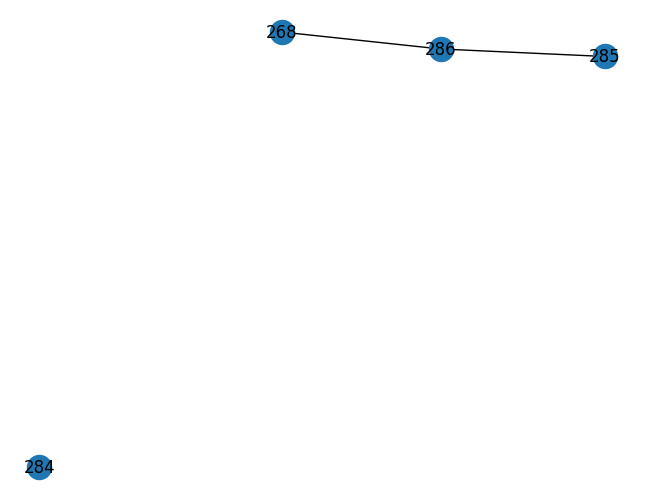

for upstream node 286, winning_node = None, error_branches = [268 284 285]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2298.921030871111 but max skip distance was 2298.921030871111
Current node skip distance was 1422.8191216850398 but max skip distance was 1422.8191216850398
Current node skip distance was 2300 but max skip distance was 2300
Current node skip distance was 1824.094137644677 but max skip distance was 2298.921030871111
Current node skip distance was 1429.9236829418774 but max skip distance was 2300.0
Current node skip distance was 1644.9145829505464 but max skip distance was 1644.9145829505464
Current node skip distance was 1457.40326984566 but max skip distance was 1644.2986054324124
Current node skip distance was 2041.5976191912664 but max skip distance was 2041.5976191912664
Current node skip distance was 1921.9547489008273 but max skip distance was 1921.9547489008273
Current node skip distance 

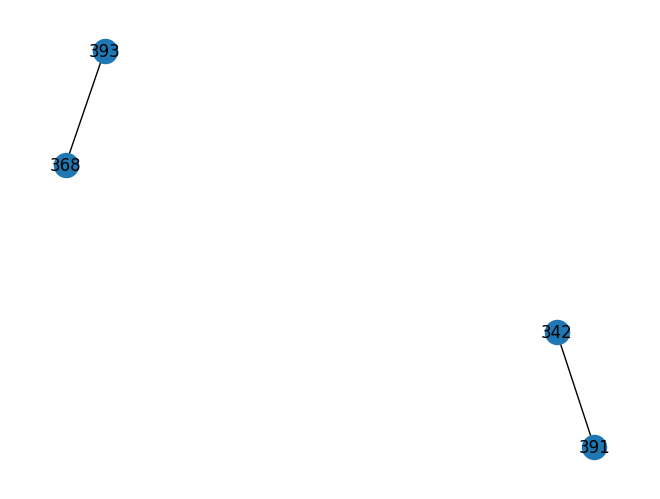

Performing global features query
Done with edge_df: 0.0009810924530029297
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056                1                      False   
1              0.000431                2                       None   

   definite_partner_width_delete  
0                          False  
1                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056      

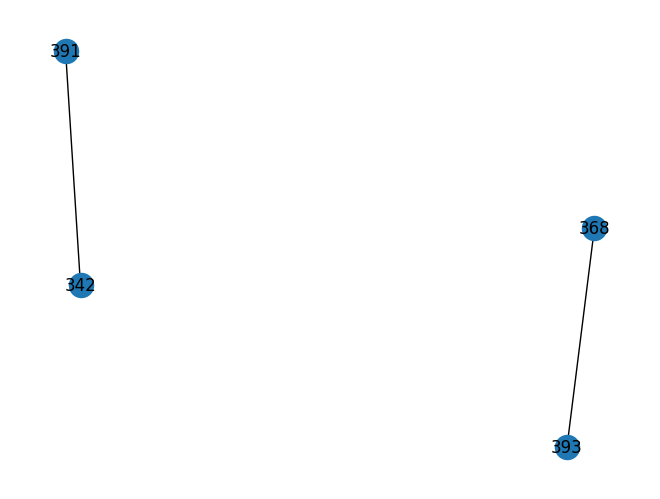

Performing node features query
Done with edge_df: 0.0012807846069335938
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056                1                      False   
1              0.000431                2                       None   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
1                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_d

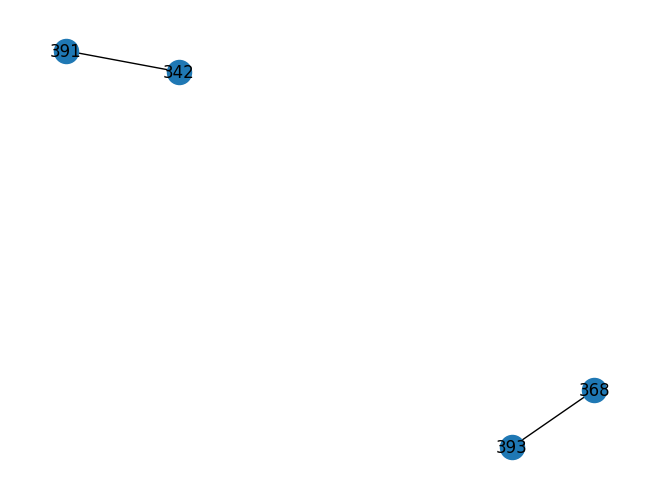

for upstream node 342, winning_node = 391, error_branches = [368 393]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (181.81578649690547) less than width_min(250)
Current node skip distance was 1857.9482625419403 but max skip distance was 1857.9482625419403
Current node skip distance was 2006.19399910225 but max skip distance was 2045.7593757531026
Current node skip distance was 1723.0631465697677 but max skip distance was 2060.1060158328014
Current node skip distance was 1931.9959154803796 but max skip distance was 2226.881251855768
Current node skip distance was 1970.0153273419096 but max skip distance was 1970.0153273419096
Current node skip distance was 1820.6045623023558 but max skip distance was 1931.9959154803796
Current node skip distance was 2000.0150089779318 but max skip distance was 2296.284725981935
Current node skip distance was 1517.477557849377 but max skip distance was 2085.7836560056353
branch_match_query = :
(((width_diff < 75) or (width_dif

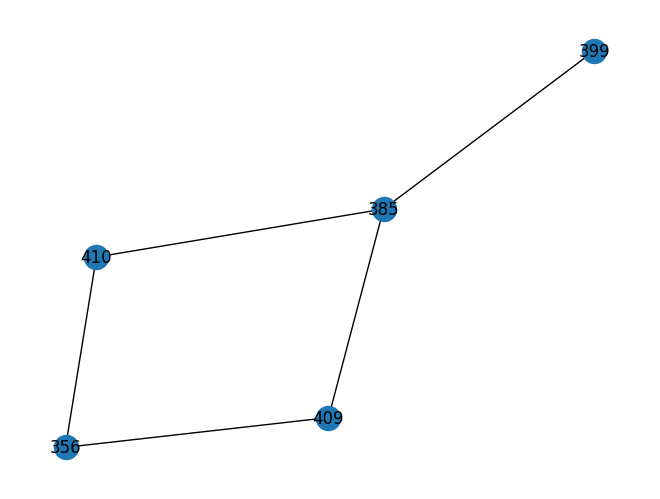

Performing global features query
Done with edge_df: 0.0012171268463134766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  385  399     58.13   11.896631               0.184625   
1  385  409     30.64    1.772880               0.027514   
2  385  410     41.34   32.296820               0.501218   
3  409  356      8.45   21.530796               0.255727   
4  410  356     23.90   12.538903               0.148928   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000114                2                       None   
1              0.000153                3                       None   
2              0.000010                1                       None   
3              0.000137                3                       None   
4              0.000027                1                       None   

  definite_pa

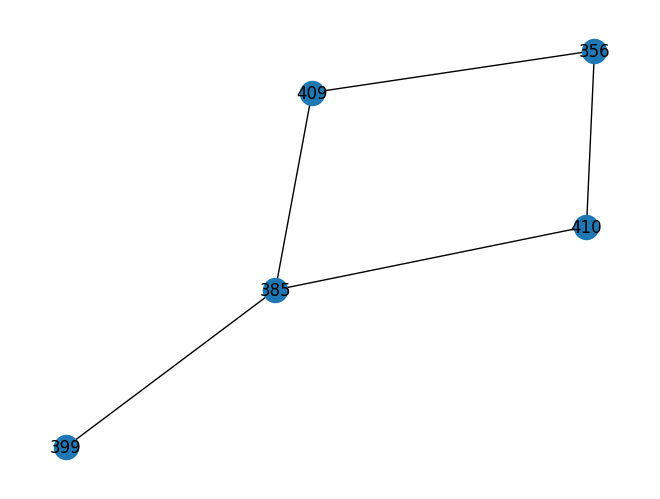

Performing node features query
Done with edge_df: 0.0012028217315673828
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  385  399     58.13   11.896631               0.184625   
1  385  409     30.64    1.772880               0.027514   
2  385  410     41.34   32.296820               0.501218   
3  409  356      8.45   21.530796               0.255727   
4  410  356     23.90   12.538903               0.148928   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000114                2                       None   
1              0.000153                3                       None   
2              0.000010                1                       None   
3              0.000137                3                       None   
4              0.000027                1                       None   

  definite_partne

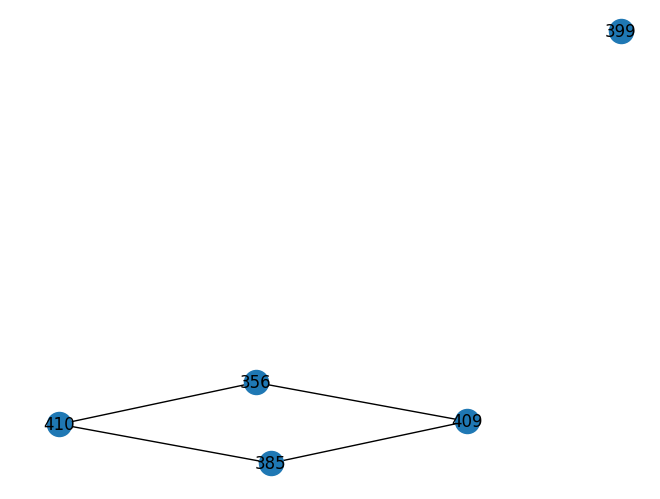

for upstream node 356, winning_node = None, error_branches = [385 399 409 410]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1402.7615383796524 but max skip distance was 1402.7615383796524
Current node skip distance was 1897.2302923052882 but max skip distance was 1897.2302923052882
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1664.313838945068 but max skip distance was 1664.313838945068
Current node skip distance was 1807.9329862391826 but max skip distance was 2300.0
Current node skip distance was 1430.0452955758667 but max skip distance was 1430.0452955758667
Current node skip distance was 1453.4280808679287 but max skip distance was 1453.4280808679287
Current node skip distance was 1475.9217580922184 but max skip distance was 2273.2624142586237
Current node skip distance was 1873.8585886753744 but max skip distance was 1873.8585886753744
Current node skip

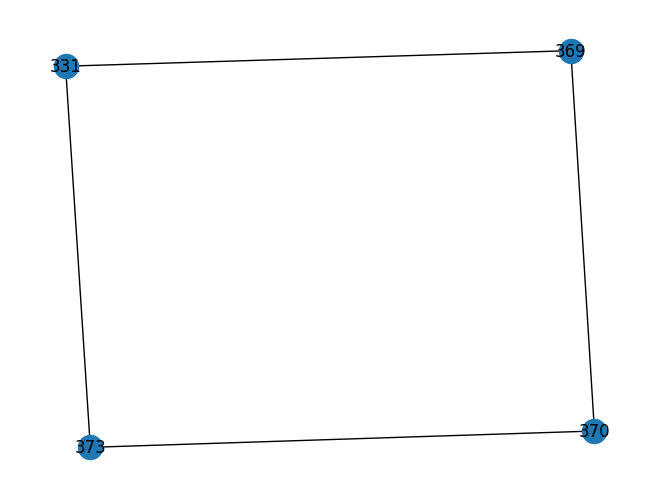

Performing global features query
Done with edge_df: 0.002613544464111328
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  331  373     24.18   22.677958               0.225768   
1  331  369     27.75    5.330397               0.056040   
2  370  373     38.61   17.418399               0.182989   
3  370  369     24.06    0.070838               0.000745   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000015                1                       None   
1              0.000140                0                       None   
2              0.000062                1                       None   
3              0.000093                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
3        

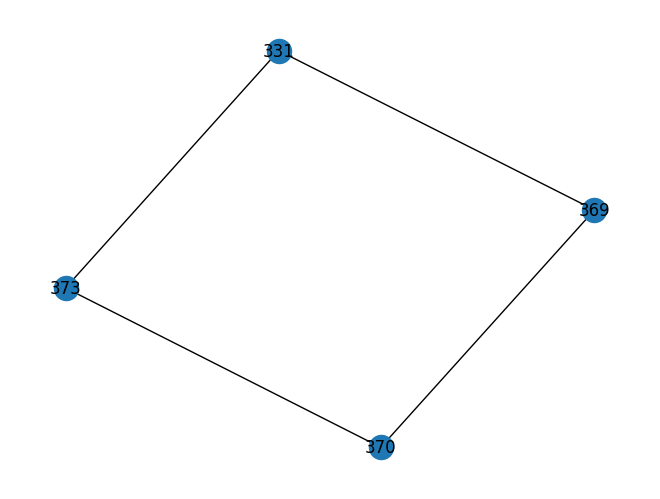

Performing node features query
Done with edge_df: 0.0015010833740234375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  331  373     24.18   22.677958               0.225768   
1  331  369     27.75    5.330397               0.056040   
2  370  373     38.61   17.418399               0.182989   
3  370  369     24.06    0.070838               0.000745   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000015                1                       None   
1              0.000140                0                       None   
2              0.000062                1                       None   
3              0.000093                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None   

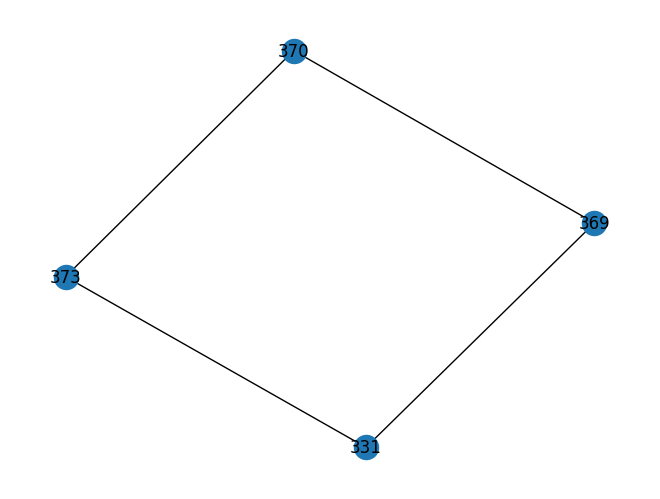

for upstream node 369, winning_node = None, error_branches = [331 370 373]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1883.850101916446 but max skip distance was 1883.850101916446
Current node skip distance was 1745.988538994956 but max skip distance was 1745.988538994956
Current node skip distance was 1490.708038892068 but max skip distance was 1574.5583127775913
Current node skip distance was 1558.385308835699 but max skip distance was 1745.988538994956
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.002016305923461914
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  336     85.72   49.348361               0.635540   
1  332  372     78.5

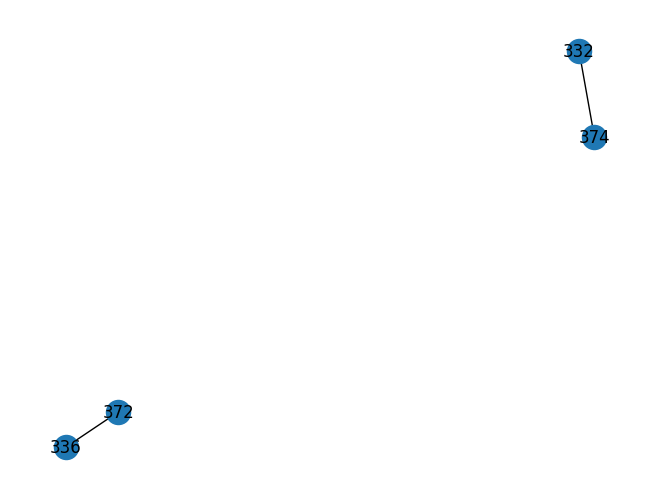

Performing global features query
Done with edge_df: 0.00150299072265625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23   12.040923               0.094813   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097                1                       False   
1              0.000130               10                       False   

  definite_partner_width_delete  
0                          None  
1                         False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23   12.040923               0.094813   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097       

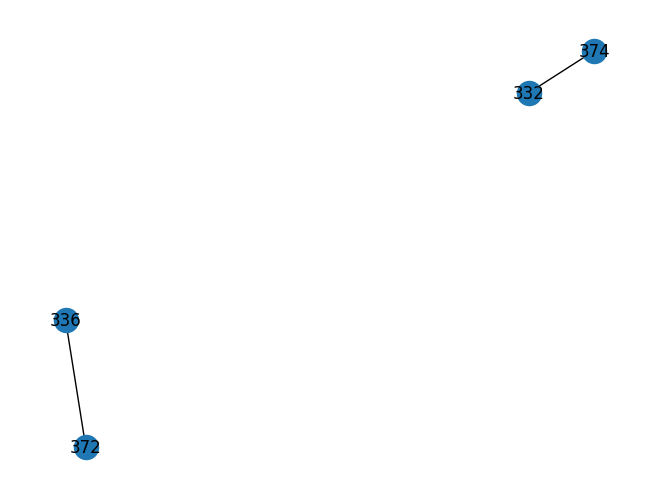

Performing node features query
Done with edge_df: 0.0009865760803222656
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23   12.040923               0.094813   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097                1                       False   
1              0.000130               10                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                         False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24   16.364508               0.174067   
1  336  372     36.23   12.040923               0.094813   

   synapse_density_diff  n_synapses_d

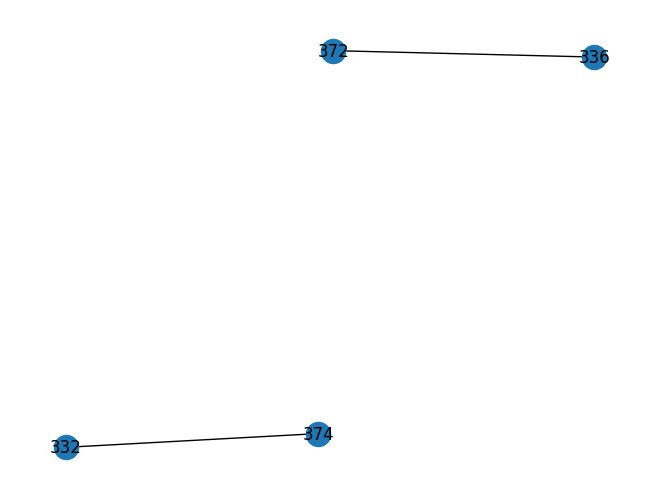

for upstream node 374, winning_node = 332, error_branches = [336 372]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (77.64796574259381) less than width_min(250)
Current node skip distance was 1824.259398723258 but max skip distance was 2221.475821813151
Current node skip distance was 2045.7593757531026 but max skip distance was 2045.7593757531026
Current node skip distance was 1921.1451543970088 but max skip distance was 1921.1451543970088
Current node skip distance was 2020.289319699952 but max skip distance was 2020.289319699952
Current node skip distance was 1992.5090733484935 but max skip distance was 2300.0
Current node skip distance was 1523.8193044553063 but max skip distance was 1586.8865547087983
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.001306772232055664
Performing Edge Query
After edge filter, # of rows = 3
Expo

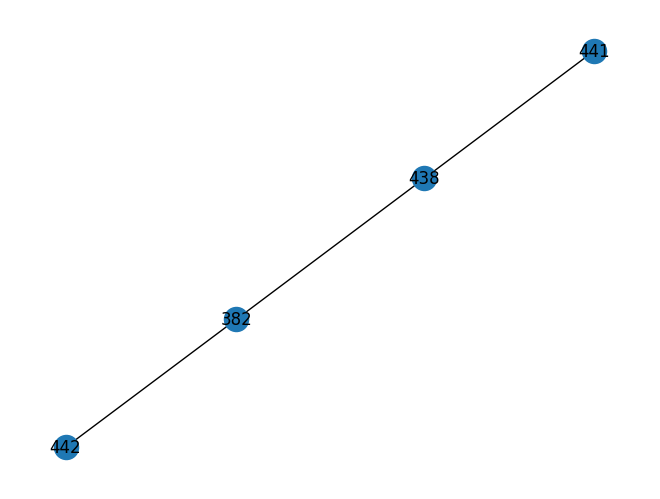

Performing global features query
Done with edge_df: 0.0011196136474609375
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   
1  438  382     46.16   19.251834               0.224599   
2  442  382     25.40   15.136140               0.176583   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000070                3                      False   
1              0.000004                1                       True   
2              0.000049                3                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   

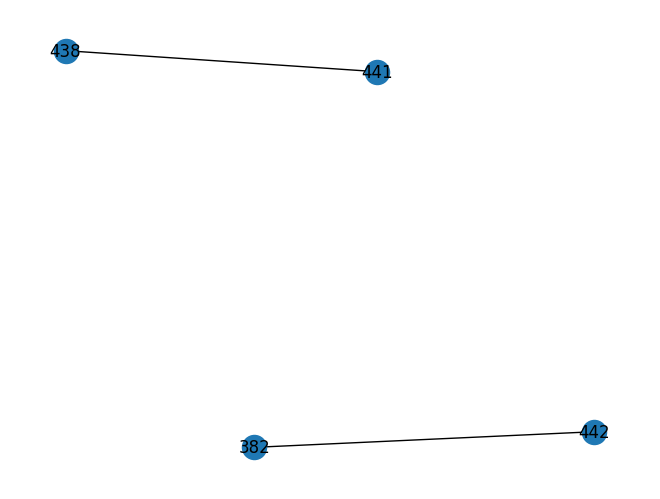

Performing node features query
Done with edge_df: 0.0010404586791992188
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   
1  442  382     25.40   15.136140               0.176583   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000070                3                      False   
1              0.000049                3                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   12.369503               0.186106   
1  442  382     25.40   15.136140               0.176583   

   synapse_density_diff  n_synapses_diff

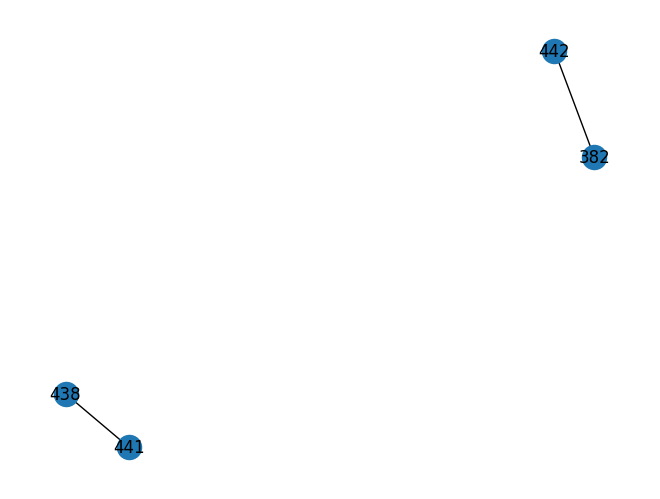

for upstream node 382, winning_node = 442, error_branches = [438 441]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (116.1121258385822) less than width_min(250)
Current node skip distance was 1574.5583127775913 but max skip distance was 1574.5583127775913
Current node skip distance was 1499.7325270056906 but max skip distance was 1499.7325270056906
Current node skip distance was 1435.1529069792289 but max skip distance was 1435.1529069792289
Current node skip distance was 1983.3865421239625 but max skip distance was 1983.3865421239625
Current node skip distance was 1906.784317756396 but max skip distance was 1906.784317756396
Current node skip distance was 1535.5603845696007 but max skip distance was 1535.5603845696007
Current node skip distance was 1924.2324437371053 but max skip distance was 1924.2324437371053
Current node skip distance was 1489.5075320461283 but max skip distance was 2259.059356157768
Current node skip distance was 1453.6175721877003 but m

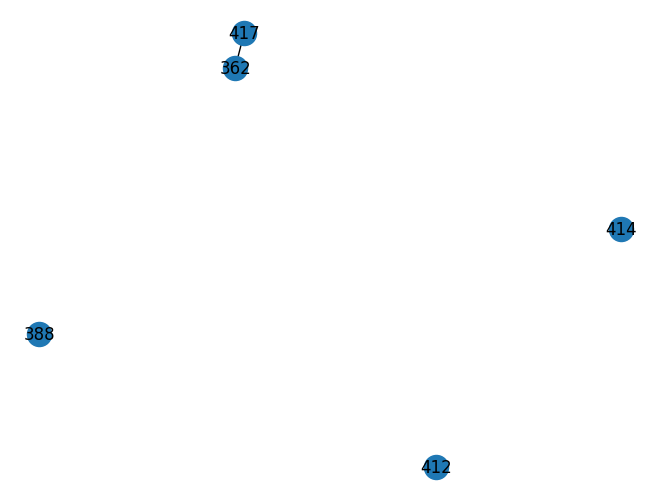

Performing global features query
Done with edge_df: 0.0027480125427246094
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete  
0                          None  


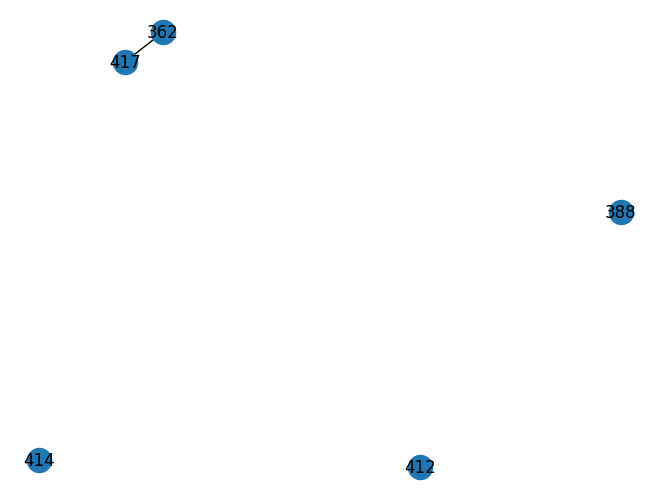

Performing node features query
Done with edge_df: 0.0016362667083740234
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


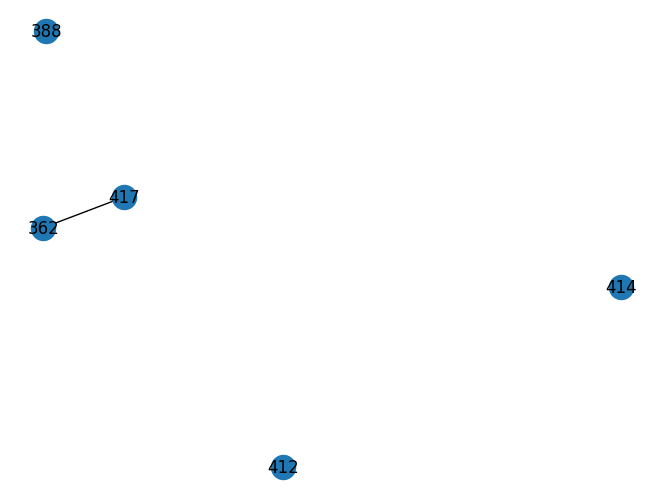

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1400.920110216385 but max skip distance was 1493.7677241238655
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0019006729125976562
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  414    106.83    4.852443               0.076766   
1  362  417      2.53   15.293383               0.241942   
2  362  413    121.33    6.990044               0.124332   
3  414  417     75.61   20.145826               0.345209   
4  414  413    106.02    2.137601               0.038022   
5  417  413     58.41   22.283427               0.396355   

   synapse_density_diff  n_synapses_diff  
0              0.000068      

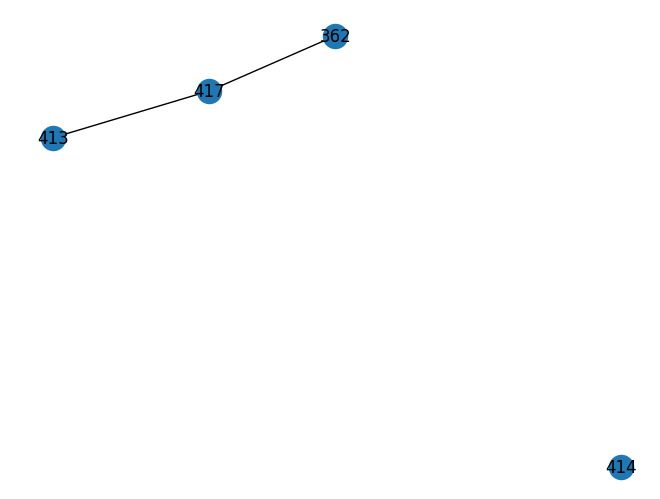

Performing global features query
Done with edge_df: 0.0012652873992919922
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   
1  417  413     58.41   22.283427               0.396355   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   
1              0.000051                1                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_part

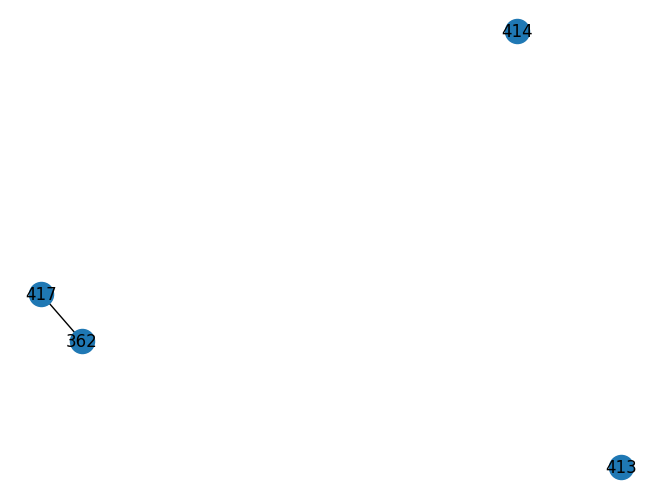

Performing node features query
Done with edge_df: 0.0009808540344238281
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


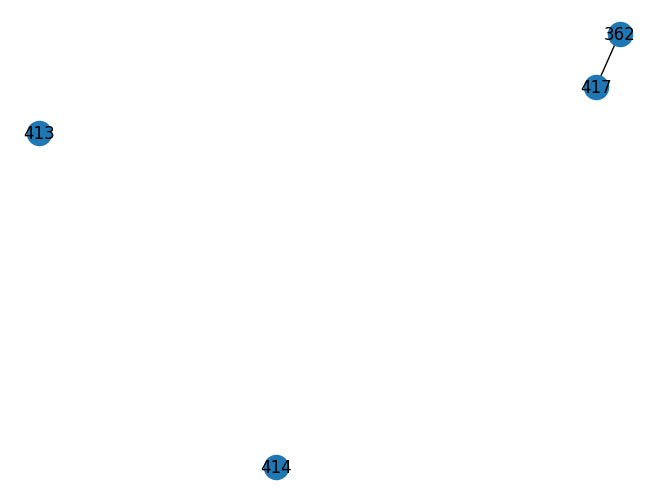

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1409.826781900253 but max skip distance was 1662.880129282748
Current node skip distance was 2019.0862723530136 but max skip distance was 2245.1172971975952
Current node skip distance was 1493.7677241238655 but max skip distance was 1493.7677241238655
Current node skip distance was 1928.8478623920432 but max skip distance was 1989.1555380837688
Current node skip distance was 1797.726209129479 but max skip distance was 2222.579722388221
Current node skip distance was 1631.0290394498056 but max skip distance was 1928.8478623920432
Current node skip distance was 1930.278903607631 but max skip distance was 2019.0862723530136
Current node skip distance was 1543.0186166671774 but max skip distance was 1543.0186166671774
Current node skip distance was 1424.7536385843455 but max skip distance was 1424.7536385843455
Current node skip distance was 1892.3149310140766 but max ski

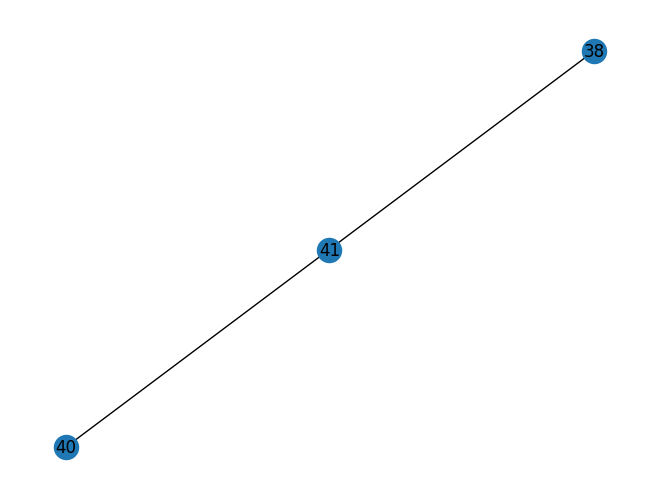

Performing global features query
Done with edge_df: 0.0013000965118408203
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  40  41     25.49   36.954583               0.358121              0.000240   
1  41  38     28.73   15.407457               0.188717              0.000197   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                1                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  40  41     25.49   36.954583               0.358121              0.000240   
1  41  38     28.73   15.407457               0.188717              0.000197   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

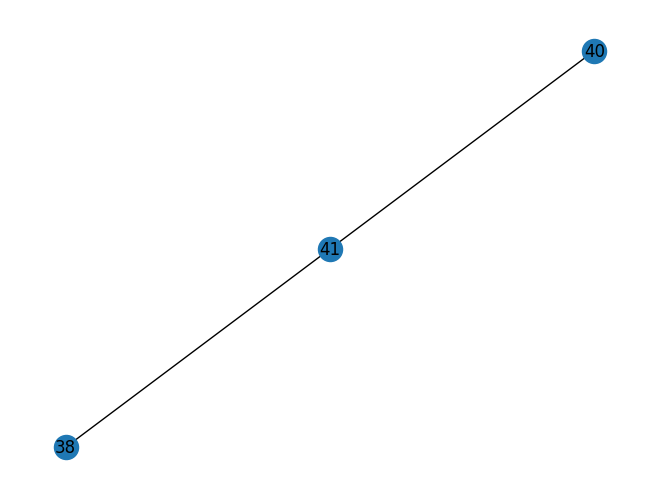

for upstream node 38, winning_node = None, error_branches = [40 41]
38 triggered axon_double_back_inh_filter
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0012674331665039062
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.433629               0.235256   
1  124  128     13.82   30.400279               0.370913   
2  125  128    149.36    3.966650               0.048397   

   synapse_density_diff  n_synapses_diff  
0              0.000049                2  
1              0.000213                4  
2              0.000263                2  
Afer Local query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.433629               0.235256   
1  124  128    

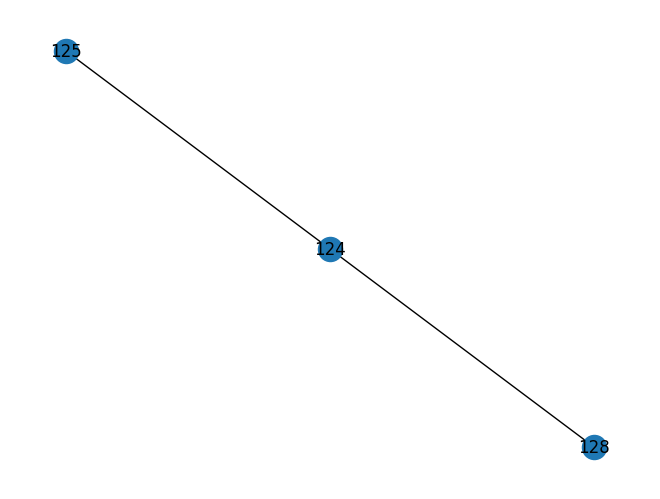

Performing global features query
Done with edge_df: 0.0023772716522216797
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.433629               0.235256   
1  124  128     13.82   30.400279               0.370913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000049                2                       None   
1              0.000213                4                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.433629               0.235256   
1  124  128     13.82   30.400279               0.370913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000049         

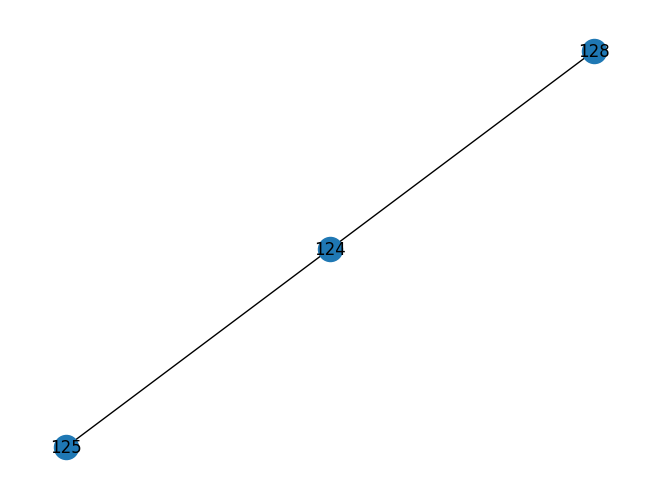

for upstream node 128, winning_node = None, error_branches = [124 125]
128 triggered axon_double_back_inh_filter
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009791851043701172
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  235  244     17.50    9.400857               0.098834   
1  235  216    146.30   70.790093               0.426684   
2  244  216     47.35   80.190950               0.483347   

   synapse_density_diff  n_synapses_diff  
0              0.000089                3  
1              0.000387                5  
2              0.000476                2  
Afer Local query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  235  244     17.50    9.400857               0.098834   
1  244  216

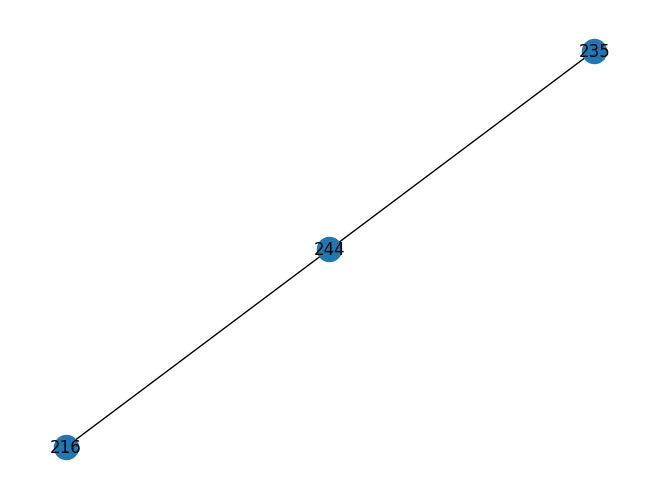

Performing global features query
Done with edge_df: 0.0013375282287597656
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  235  244     17.50    9.400857               0.098834   
1  244  216     47.35   80.190950               0.483347   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000089                3                       False   
1              0.000476                2                        True   

   definite_partner_width_delete  
0                          False  
1                           True  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  235  244      17.5    9.400857               0.098834   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000089                3                       False   

   definite_

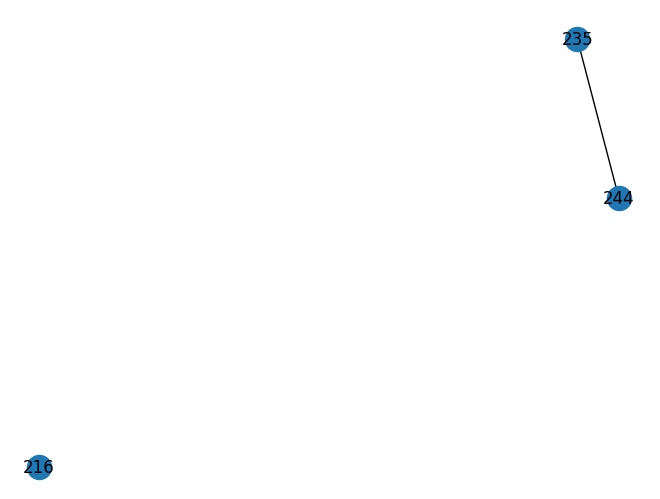

216 triggered axon_double_back_inh_filter
limb_branch_dict_to_cancel = {'L0': array([288, 289, 236, 206, 247, 250, 286, 287, 111, 130, 131, 103, 109,
       110, 113, 114, 116, 117, 120, 121, 123, 115, 118,  40,  41, 124,
       125, 235, 244])}
width_max = 500
upstream_width_max = 500
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
N_branches on limbs before simplification
L0: 264
L1: 14
L2: 15
L3: 13
L4: 11
L5: 5
L6: 1
--- STARTING merge_floating_end_nodes_to_parent----



---N_branches on limbs AFTER merge_floating_end_nodes_to_parent---
L0: 264 (difference of 0)
L1: 14 (difference of 0)
L2: 15 (difference of 0)
L3: 13 (difference of 0)
L4: 11 (difference of 0)
L5: 5 (difference of 0)
L6: 1 (difference of 0)



--- STARTING COMBINING BRANCHES----



---N_branches on limbs AFTER combine_path_branches---
L0: 260 (difference of 4)
L1: 13 (difference of 1)
L2: 15 (difference of 0)
L3: 13 (difference of 0)
L4

In [40]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [41]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)

No skeletons to stack so returning empty list
No skeletons to stack so returning empty list

Working on compartment basal---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 11.26, 'soma_angle_min': 11.26}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 6, 'soma_angle_max': 154.87, 'soma_angle_min': 24.99}


# Saving off the autoproofread neuron

In [42]:
neuron_obj_proof.neuron_graph_after_proof

In [43]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

Total time for soma meshes compression = 0.6032125949859619
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.35991930961608887
Total time for limb_meshes compression = 1.9419596195220947
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 39.716126680374146
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:139749666302464
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:139749666302176
Total time for compression = 155.45501255989075


---Finished outputing neuron at location: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/864691135567721964_auto_proof---


'864691135567721964_auto_proof.pbz2'

# Plotting the final neuron

In [ ]:
from neurd import synapse_utils as syu

In [ ]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [ ]:
nviz.plot_compartments(neuron_obj_proof)